# Landslide Prediction using Machine Learning and Deep Learning - Part 1

## Project Overview
This notebook implements a comprehensive analysis for landslide prediction using multiple machine learning approaches. We compare traditional machine learning models with deep learning (LSTM) to determine the most effective approach for predicting landslide occurrences.

### Models Implemented:
1. Logistic Regression
2. Random Forest
3. Gradient Boosting
4. Support Vector Machine (SVM)
5. Long Short-Term Memory (LSTM) Neural Network

### Performance Metrics Used:
- Accuracy
- Precision
- Recall
- F1-Score
- AUC-ROC Score

### Dependencies Required:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- tensorflow
- keras

## 1. Library Imports and Setup

Here we import all necessary libraries and set up our environment. The imports are organized by functionality:
- Data manipulation libraries
- Visualization libraries
- Machine learning libraries
- Deep learning libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from keras import Sequential, Input
from keras.layers import Dense, LSTM, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## 2. Data Loading and Initial Exploration

In this section, we:
1. Load the landslide dataset
2. Examine basic dataset characteristics
3. Check data quality and missing values

This initial exploration is crucial for understanding our data structure and potential preprocessing needs.

In [3]:
# Load the data
data = pd.read_csv('dataset.csv')
print("Dataset Info:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190890 entries, 0 to 190889
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Landslide      190890 non-null  int64  
 1   Aspect         190890 non-null  float64
 2   Curvature      190890 non-null  float64
 3   Earthquake     190890 non-null  float64
 4   Elevation      190890 non-null  float64
 5   Flow           190890 non-null  float64
 6   Lithology      190890 non-null  float64
 7   NDVI           190890 non-null  float64
 8   NDWI           190890 non-null  float64
 9   Plan           190890 non-null  float64
 10  Precipitation  190890 non-null  float64
 11  Profile        190890 non-null  float64
 12  Slope          190890 non-null  float64
 13  temperature    190890 non-null  float64
 14  humidity       190890 non-null  float64
 15  rain           190890 non-null  float64
 16  moisture       190890 non-null  float64
 17  pressure       

## 3. Data Visualization and Feature Analysis

### Correlation Analysis
We visualize feature relationships using a correlation matrix heatmap. This helps us:
- Identify strongly correlated features
- Detect potential multicollinearity
- Guide feature selection decisions
- Understand the relationship between features and target variable

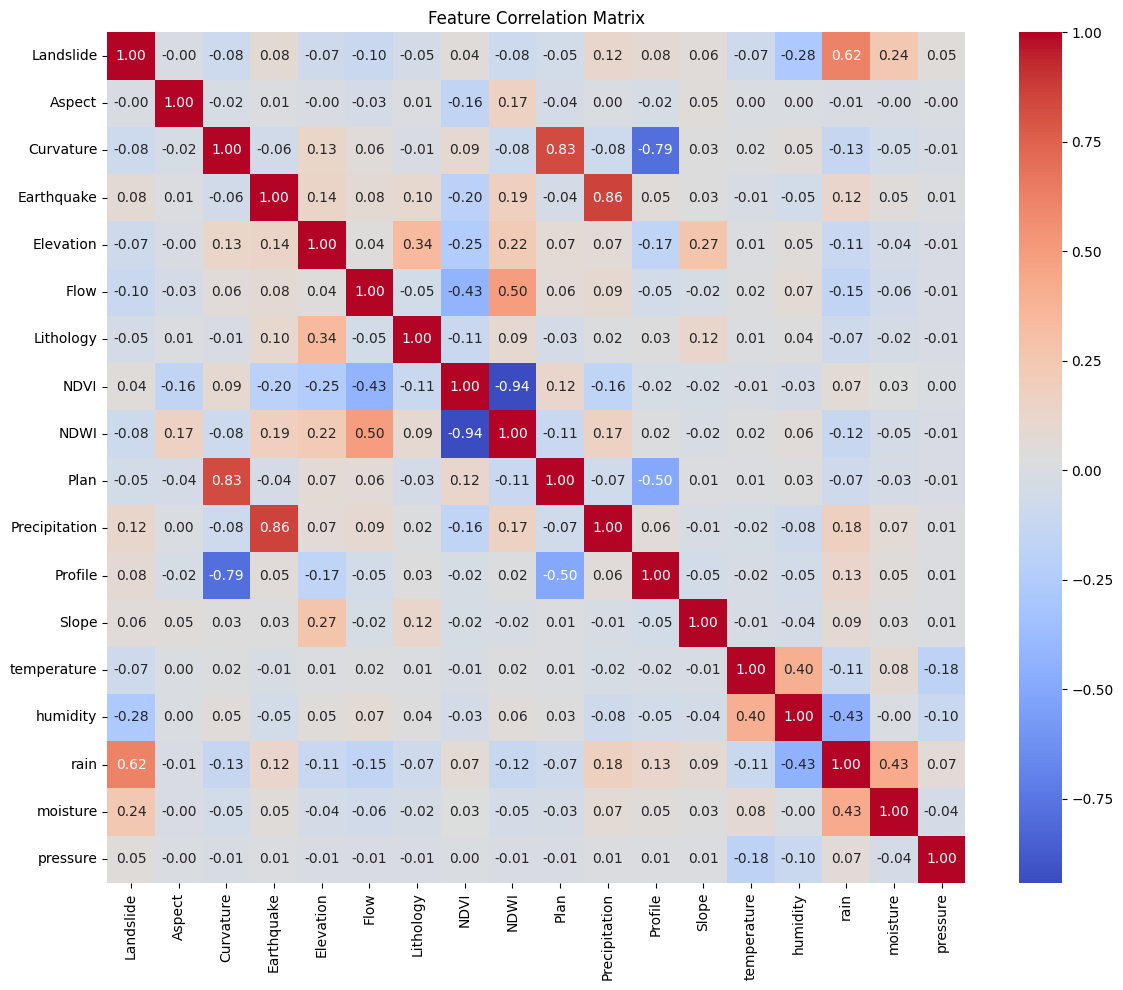

In [4]:
# Plot correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

## 4. Data Preprocessing

### Comprehensive Preprocessing Pipeline
Our preprocessing steps include:
1. Feature-target separation
2. Train-test split (80-20)
3. Missing value imputation
4. Feature scaling
5. LSTM data reshaping

This ensures our data is properly prepared for both traditional ML and deep learning models.

In [5]:
def preprocess_data(data):
    """Preprocess the data"""
    # Separate features and target
    X = data.drop('Landslide', axis=1)
    y = data['Landslide']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.transform(X_test_imputed)
    
    # Reshape data for LSTM (samples, timesteps, features)
    X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
    X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))
    
    return X_train_scaled, X_test_scaled, X_train_lstm, X_test_lstm, y_train, y_test

## 5. Model Creation Functions

### Model Architecture and Evaluation
We define two key functions:
1. LSTM model creation with modern architecture
2. Comprehensive model evaluation metrics

These functions ensure consistent model creation and evaluation across all experiments.

In [6]:
def create_lstm_model(input_shape):
    """Create LSTM model with updated Keras 3 syntax"""
    model = Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True),
        BatchNormalization(),
        Dropout(0.3),
        LSTM(64),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """Calculate and return model performance metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'AUC-ROC': roc_auc_score(y_true, y_pred_proba)
    }
    return metrics